In [2]:
import tensorflow as tf
import os

In [5]:
import cv2


In [7]:
data_dir='data'

In [8]:
image_exts=['jpeg','jpg','bmp','png']

In [11]:
os.listdir(os.path.join(data_dir,'happy'))

['05-12-21-happy-people.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '110754-utyeqqosky-1547658396.jpeg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '220px-Happy_People_A_Year_in_the_Taiga_poster.jpg',
 '2560px-Happy_People.jpg',
 '343515-worldhappinessreport1440.jpg',
 '35438_hd.jpg',
 '41740_hd.jpg',
 '427394C200000578-0-image-a-24_1500384481554.jpg',
 '5400ea_cd54b25fdd2a4216819fe49413f0c976mv2.png',
 '56f455011e0000b300705475.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '7VR73K6EP5ETVEOUFANWBUYJEQ.jpg',
 '9b65a25adca61c48bcb01370116723e3--happy-people-brings.jpg',
 'AKPQZvzaX9EaIizdNKyoEQbF0SVSVScueVFZQmxHm5dXs64-c-mo.jpg',
 'A_Sep20_14_1189155141.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'compassion.jpg',
 'dv2051009.jpg',
 'es_27x40_pre_final_en-us_cps_custom-c5a0cc5b4b

In [20]:
for image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)
    
    for image in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image)
        
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)

            if tip not in image_exts:
                print("Image not in ext list: {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in ext list: data\happy\427394C200000578-0-image-a-24_1500384481554.jpg
Image not in ext list: data\happy\traitshappypeople.jpg
Image not in ext list: data\happy\vector5.svg
Image not in ext list: data\happy\vector6.svg
Image not in ext list: data\happy\vector7.svg
Image not in ext list: data\happy\vector8.svg
Image not in ext list: data\sad\depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
Image not in ext list: data\sad\depositphotos_86851530-stock-photo-close-up-of-african-young.jpg
Image not in ext list: data\sad\origin-144.jpg
Image not in ext list: data\sad\vector10.svg
Image not in ext list: data\sad\vector11.svg
Image not in ext list: data\sad\vector12.svg
Image not in ext list: data\sad\vector9.svg
Image not in ext list: data\sad\very-sad-man-sitting-alone-on-white-background-depressed-young-man-sitting-businessman-vector.jpg


In [21]:
for image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)
    
    for image in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image)
        
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)

            if tip not in image_exts:
                print("Image not in ext list: {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [22]:
import numpy as np
from matplotlib import pyplot as plt

In [23]:
data=tf.keras.utils.image_dataset_from_directory(data_dir)

Found 307 files belonging to 2 classes.


In [25]:
data_iterator=data.as_numpy_iterator()

In [26]:
batch=data_iterator.next()

In [27]:
batch[0].shape

(32, 256, 256, 3)

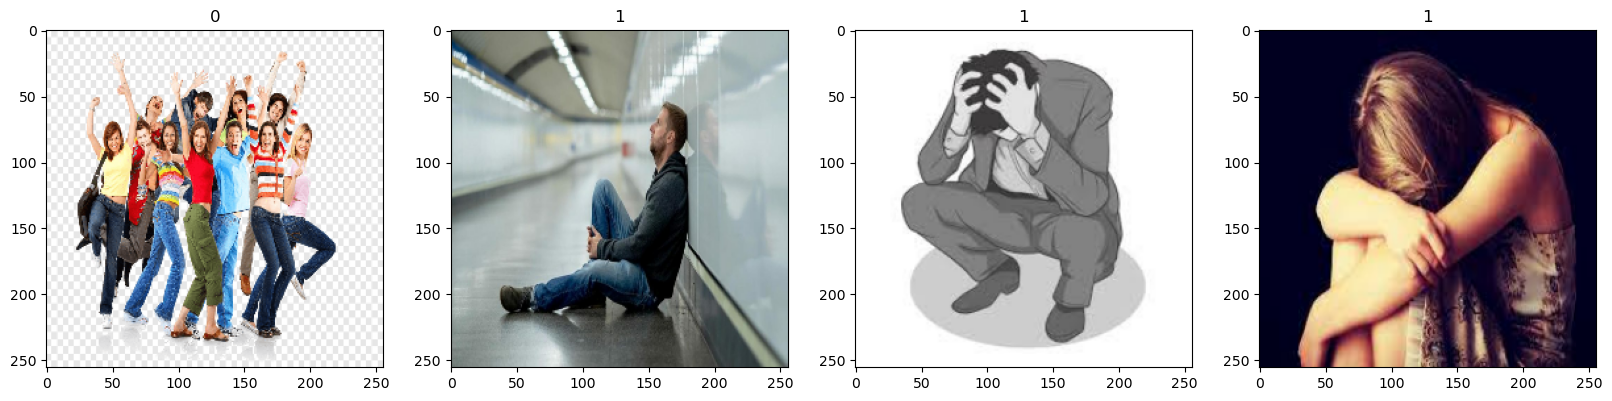

In [28]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [29]:
data=data.map(lambda x,y:(x/255,y))

In [33]:
data.as_numpy_iterator().next()[0].max()

1.0

In [34]:
len(data)

10

In [35]:
train_size=int(len(data)*.5)
val_size=int(len(data)*.2)+1
test_size=int(len(data)*.1)+1

In [36]:
train_size+val_size+test_size

10

In [38]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [39]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [51]:
model=Sequential()
model.add(Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)))

model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(1,activation='sigmoid'))



In [52]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
history=model.fit(train,epochs=15,validation_data=val)

Epoch 1/15
5/5 [==============================] - 19s 3s/step - loss: 2.4081 - accuracy: 0.5063 - val_loss: 0.6750 - val_accuracy: 0.5104
Epoch 2/15
5/5 [==============================] - 17s 3s/step - loss: 0.8024 - accuracy: 0.4750 - val_loss: 0.6836 - val_accuracy: 0.4896
Epoch 3/15
5/5 [==============================] - 17s 3s/step - loss: 0.6665 - accuracy: 0.5437 - val_loss: 0.6304 - val_accuracy: 0.7812
Epoch 4/15
5/5 [==============================] - 16s 3s/step - loss: 0.6296 - accuracy: 0.6812 - val_loss: 0.5018 - val_accuracy: 0.7812
Epoch 5/15
5/5 [==============================] - 17s 3s/step - loss: 0.5577 - accuracy: 0.6938 - val_loss: 0.4743 - val_accuracy: 0.7500
Epoch 6/15
5/5 [==============================] - 16s 3s/step - loss: 0.4408 - accuracy: 0.8313 - val_loss: 0.4935 - val_accuracy: 0.7500
Epoch 7/15
5/5 [==============================] - 18s 3s/step - loss: 0.3675 - accuracy: 0.8500 - val_loss: 0.3020 - val_accuracy: 0.8646
Epoch 8/15
5/5 [==================

In [55]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [57]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)
    

1/1 [==============================] - 1s 589ms/step


In [58]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:0.9583333134651184,Recall:1.0,Accuracy:0.9803921580314636


In [59]:
import cv2


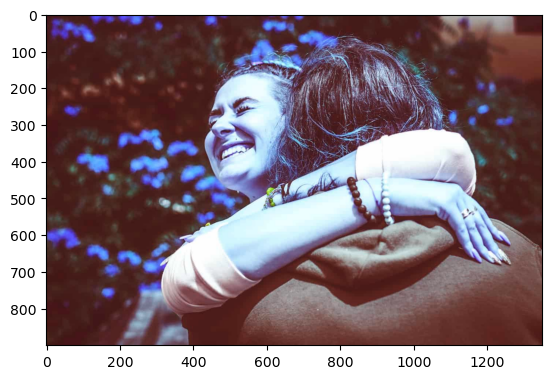

In [98]:
img=cv2.imread('person.jpeg')
plt.imshow(img)

In [99]:
img.shape

(900, 1350, 3)

<function matplotlib.pyplot.show(close=None, block=None)>

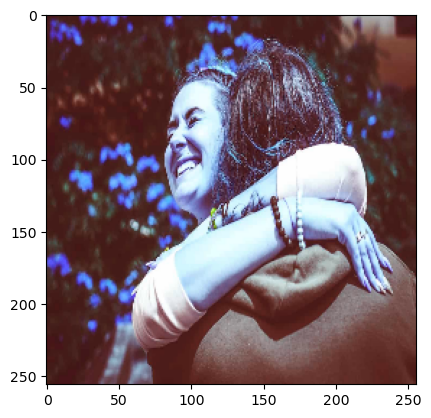

In [100]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show


In [101]:
resize


<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[ 71.86328 ,  28.863281,  31.863281],
        [ 67.41016 ,  24.410156,  27.410156],
        [ 68.      ,  25.      ,  28.      ],
        ...,
        [ 69.      ,  30.      ,  32.      ],
        [ 69.      ,  30.      ,  32.      ],
        [ 69.      ,  30.      ,  32.      ]],

       [[ 71.86328 ,  28.863281,  31.863281],
        [ 67.41016 ,  24.410156,  27.410156],
        [ 68.      ,  25.      ,  28.      ],
        ...,
        [ 69.      ,  30.      ,  32.      ],
        [ 69.      ,  30.      ,  32.      ],
        [ 69.      ,  30.      ,  32.      ]],

       [[ 70.      ,  27.      ,  30.      ],
        [ 67.24747 ,  24.247467,  27.247467],
        [ 68.45865 ,  25.458649,  28.458649],
        ...,
        [ 69.      ,  30.      ,  32.      ],
        [ 69.      ,  30.      ,  32.      ],
        [ 69.      ,  30.      ,  32.      ]],

       ...,

       [[ 68.4653  ,  32.4653  ,  24.465302],
        [ 72.

In [102]:
y_hat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 38ms/step


In [103]:
y_hat

array([[0.05684535]], dtype=float32)

In [104]:
if y_hat>0.5:
    print("the person is sad in the picture")
else:
    print('the person is happy in the picture')

the person is happy in the picture
